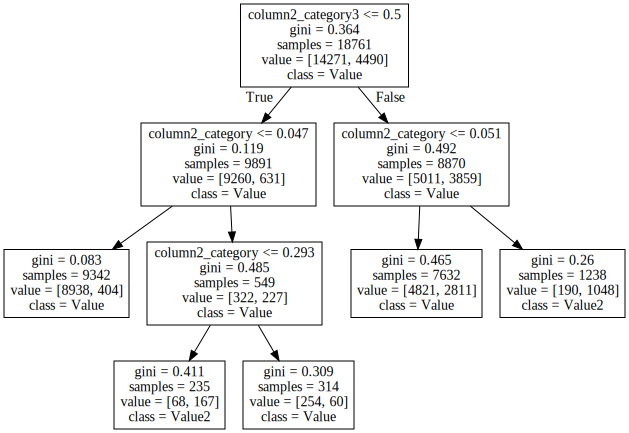

In [4]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Digraph, Source, render

#Please download the dataset through: https://gofile.io/?c=EDn86R (Public file sharing service)
MyDataset = pd.read_csv("C:\MyDataSets\Datasets\TreeDataset.csv")

Y = MyDataset[['ColumnY']]

#Converting any categorical variables to dummy variables required by sklearn CART function
#This array will develop two metrix. Consequently, we need to separate them using the stattools library and naming two variables
variable_np = np.array(MyDataset['Columnvar'])
(variable_cat, variable_cat_dic) = stattools.categorical(variable_np, drop = True, dictnames = True)

#Merge the dummy variables to the dataset and develop the variables
variable_cat_df = pd.DataFrame(variable_cat)
X = pd.concat((MyDataset[['column2_category']], variable_cat_df), axis=1)

#Names of the categories of X (will help in visualizing a category later on)
X_names = ["column2_category", "column2_category2", "column2_category3", "column2_category4", "column2_category5", "column2_category6"]


#Binary values for the F variable
Y_names = ["Value", "Value2"]

#Running the CART algorithm (With only 5 nodes. Change nodes depending on the analysis as well as data [categories])
cart01 = DecisionTreeClassifier (criterion = "gini", max_leaf_nodes=5).fit(X,Y)

#Exporting tree diagram
export_graphviz(cart01, out_file = "C:\MyDataSets\Datasets\TreeClassifier.dot", feature_names=X_names, class_names=Y_names)


#Load and view saved .dot file in png format
with open("C:\MyDataSets\Datasets\TreeClassifier.dot") as f:
    tree_graph = f.read()

render('dot', 'png', 'C:\MyDataSets\Datasets\TreeClassifier.dot')

#view source file visually in jupyter notebook
Source(tree_graph)


In [3]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels.tools.tools as stattools
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report
from graphviz import Digraph, Source, render

MyDataset = pd.read_csv("C:\MyDataSets\Datasets\TreeDataset.csv")

Y = MyDataset[['ColumnY']]

#Converting any categorical variables to dummy variables required by sklearn CART function
#This array will develop two metrix. Consequently, we need to separate them using the stattools library and naming two variables
variable_np = np.array(MyDataset['Columnvar'])
(variable_cat, variable_cat_dic) = stattools.categorical(variable_np, drop = True, dictnames = True)

#Merge the dummy variables to the dataset and develop the variables
variable_cat_df = pd.DataFrame(variable_cat)
X = pd.concat((MyDataset[['column2_category']], variable_cat_df), axis=1)


#splitting the data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.4, random_state=25)


#Running the CART algorithm (With only 5 nodes. Change nodes depending on the analysis as well as data [categories])
cart01 = DecisionTreeClassifier (criterion = "gini", max_leaf_nodes=5).fit(X_train,Y_train)
predicted = cart01.predict(X_test)

#printing the confusion matrix (report) to determine model value
reportcart = classification_report(Y_test, predicted)
print(reportcart)

#F1 score = 1 (Harmony), F>1 (recall higher than precision), F<1 (precision higher than recall), F=2 (recall = precision*2) 


              precision    recall  f1-score   support

       Value       0.81      0.98      0.89      5688
      Value2       0.84      0.28      0.42      1817

    accuracy                           0.81      7505
   macro avg       0.82      0.63      0.65      7505
weighted avg       0.82      0.81      0.77      7505

